**In notebook settings do not select Omit code cell output when saving this notebook **


In this assignement you will build a decision tree and a random forest classifier to classify x ray images of potential covid 19 patients. For Test and training data refer to canvas.

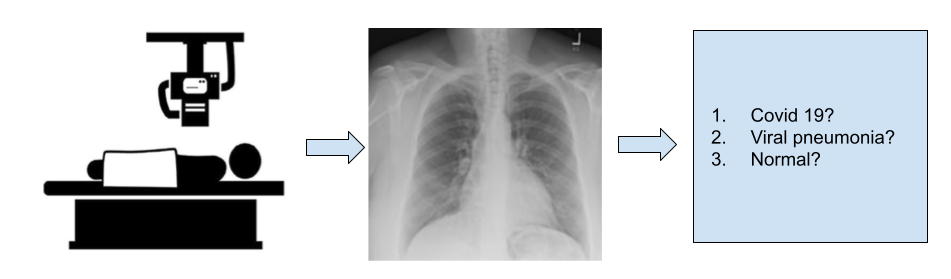

Step 01 : import any libraries you want here. Some common ones are already imported.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# add additional libraries used

Step 02 : upload the data from canvas to the top level folder of your google drive. write code to load the data from the google drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import glob
from PIL import Image
import numpy as np

# Define the categories for the dataset
categories = ['Covid', 'Viral Pneumonia', 'Normal']

def load_data(root_path):
    """
    Loads images and corresponding labels from the dataset at root_path.

    Parameters:
    root_path (str): The path to the dataset folder (either train or test).

    Returns:
    X (numpy array): Array of image data.
    y (numpy array): Array of corresponding labels.
    """
    images = []
    labels = []

    # Loop over each category (Covid, Viral Pneumonia, Normal)
    for category in categories:
        folder_path = os.path.join(root_path, category)
        label = categories.index(category)  # Assign label: 0 for COVID-19, 1 for viral pneumonia, etc.

        # Use glob to find all image files in the folder (JPEG and PNG formats)
        image_files = glob.glob(os.path.join(folder_path, '*.[Pp][Nn][Gg]')) + \
                      glob.glob(os.path.join(folder_path, '*.[Jj][Pp][Gg]')) + \
                      glob.glob(os.path.join(folder_path, '*.[Jj][Pp][Ee][Gg]'))

        # Loop over each image file and process
        for image_file in image_files:
            # Print the path of the current image file
            print(f"Loading: {image_file}")
            # Open the image and convert it to grayscale
            img = Image.open(image_file).convert('L')
            # Resize the image
            img = img.resize((150, 150))
            # Convert the image to a numpy array
            img_array = np.array(img)

            # Append the image array and label to the lists
            images.append(img_array)
            labels.append(label)

    # Convert the lists of images and labels to numpy arrays
    X = np.array(images)
    y = np.array(labels)

    print(f'Loaded {len(X)} images from {root_path}.')

    return X, y

# Define the root paths for training and testing data
train_path = '/content/drive/MyDrive/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Covid19-dataset/test'

# Load train and test data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/019.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/010.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/04.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/033.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/092.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/09.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00015a.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/COVID-00015b.png
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/015.jpg
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/020.jpg
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/091.jpg
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/067.jpg
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/064.jpg
Loading: /content/drive/MyDrive/Covid19-dataset/train/Covid/07.jpg
Loading: /content/drive/MyDrive/C

Step 03: visualize one x-ray image from each type : "covid 19", "viral pneumonia", "normal"

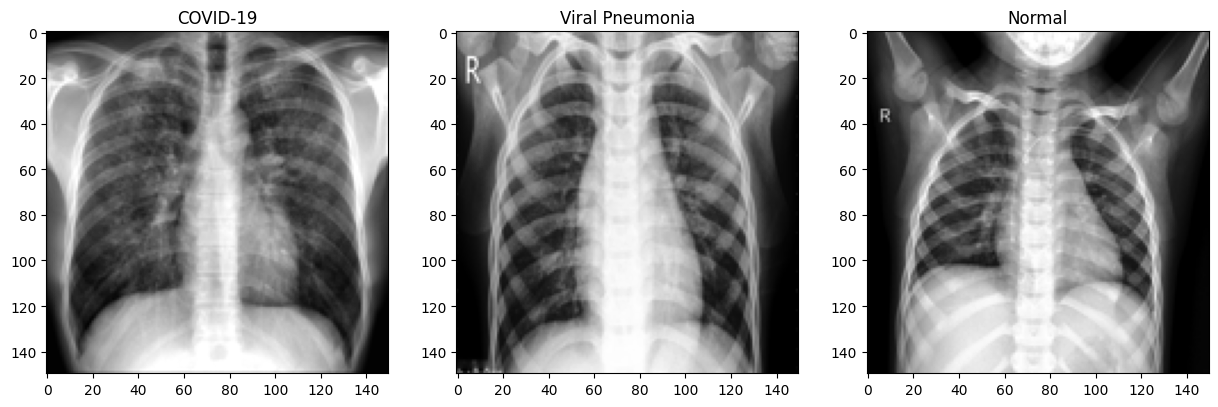

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X_train[y_train == 0][0], cmap='gray')  # COVID-19
axs[0].set_title('COVID-19')
axs[1].imshow(X_train[y_train == 1][0], cmap='gray')  # Viral Pneumonia
axs[1].set_title('Viral Pneumonia')
axs[2].imshow(X_train[y_train == 2][0], cmap='gray')  # Normal
axs[2].set_title('Normal')
plt.show()

Step 04 : Find the best decision tree to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the max_depth using 5 fold cross validation.  

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

num_samples, width, height = X_train.shape
X_train_flatten = X_train.reshape((num_samples, width * height))

num_samples, width, height = X_test.shape
X_test_flatten = X_test.reshape((num_samples, width * height))


# Set the hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteria to split nodes
    'max_depth': [5, 10, 15, None],    # Depth of the tree
    'random_state': [42]               # Random seed for reproducibility
}


# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Set up GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_dt.fit(X_train_flatten, y_train)

# Output the best parameters and accuracy score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)

# Use the best estimator to predict on the test set
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_flatten)

# Evaluate performance
print("Test accuracy for Decision Tree:", best_dt.score(X_test_flatten, y_test))

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'random_state': 42}
Best cross-validation accuracy for Decision Tree: 0.7930980392156861
Test accuracy for Decision Tree: 0.696969696969697


Step 05 : Draw the confution matrix. Starter code is given below.

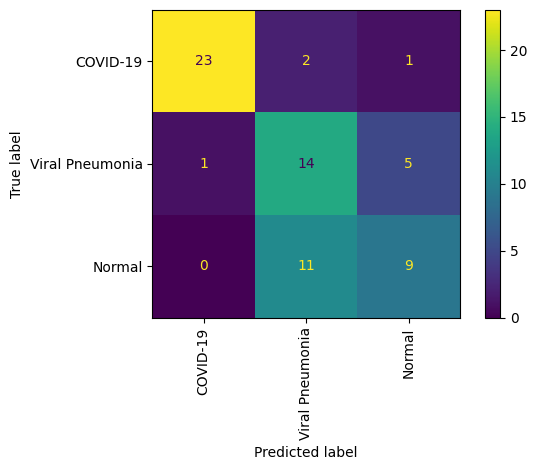

In [8]:
ConfusionMatrixDisplay.from_estimator(
    best_dt, X_test_flatten, y_test, display_labels=['COVID-19', 'Viral Pneumonia', 'Normal'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Step 06 : Find a random forest classifier to classifiy the x-ray images. Remember to set the random seed for reproducibiity. Find the best critirion and the number of trees needed using 5 fold cross validation.

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

num_samples, width, height = X_train.shape
X_train_flatten = X_train.reshape((num_samples, width * height))

num_samples, width, height = X_test.shape
X_test_flatten = X_test.reshape((num_samples, width * height))

# Set up the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for criterion and number of trees (n_estimators)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Different splitting criteria
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
     'random_state': [42]               # Random seed for reproducibility

}

# Perform GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using the training data
grid_search.fit(X_train_flatten, y_train)

# Display the best parameters found by the grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Optionally evaluate on test data (optional, to check performance on unseen data)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_flatten)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Best parameters: {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 42}
Best cross-validation accuracy: 0.8963
Test accuracy with best parameters: 0.8485


Step 07 : Draw the confution matrix. Starter code is given below.

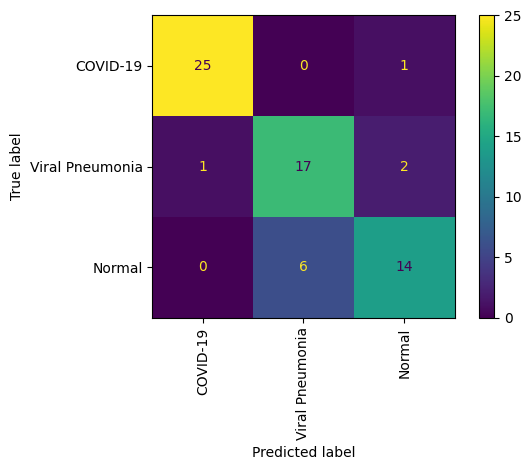

In [10]:
ConfusionMatrixDisplay.from_estimator(
    best_rf_model, X_test_flatten, y_test, display_labels=['COVID-19', 'Viral Pneumonia', 'Normal'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()